<a href="https://colab.research.google.com/github/CCarito/Trending-topic-o-c-mo-analizar-los-sentimientos-en-Twitter/blob/main/Tweets_by_Selenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Trending topic or how to analyze sentiment on Twitter

Juan Villaseñor, a mechatronics graduate, and Ana Díaz, a marketing graduate, work in the analysis team of CNN MX. With the aim of adding novel content to their platform, the team decided to create a section that covers interesting topics and presents statistical analysis. In a first approach, the Marketing team suggests an alpha test using Twitter data, and Ana assigns Juan to lead the project. Juan proposes to analyze the sentiment in Twitter comments and, after delimiting the project, focuses on the trending topic of the month in Mexico about Checo Pérez. Juan processes more than 10,000 tweets and performs sentiment analysis to obtain useful data and store it in a MySQL database. Then, Juan compiles the results in a report that includes questions such as "How objective are the tweets about the topic?" and "How positive are the comments expected to be tomorrow?"

## Extraction of Tweets

In [ ]:
!pip install selenium

In [ ]:
!sudo apt-get install libu2f-udev

In [ ]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!sudo dpkg -i google-chrome-stable_current_amd64.deb

In [ ]:
!google-chrome --version

Google Chrome 111.0.5563.110 


In [ ]:
# Importing libraries
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import pandas as pd
import csv
import datetime
from openpyxl import load_workbook

In [ ]:
# Initialize the Chrome driver
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', chrome_options=options)

<ipython-input-19-44d8f425665a>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver', chrome_options=options)


In [ ]:
# Variable initialization
hashtag = '#checopérez'
limit = 20000
tweets = []
tweet_ids = set()
last_position = driver.execute_script('return window.pageYOffset;')
scrolling = True

In [ ]:
# Function to extract information from Tweets
def get_tweet_data(tweet):
  """Extract data from tweet data"""
  try:
    tweet_date = tweet.find_element('xpath', './/time').get_attribute('datetime')
    tweet_text = tweet.find_element('xpath', '//*[@data-testid="tweetText"]/span[1]').text
  except NoSuchElementException:
    return

  data_tweet = [tweet_text, tweet_date] 

  return data_tweet
  


In [ ]:
# Navigating through Twitter Trends
driver.get("https://twitter.com/explore/tabs/trending")

In [ ]:
# Find the search box
topic = driver.find_element('xpath','//input[@data-testid="SearchBox_Search_Input"]')

In [ ]:
# Enter the topic
topic.send_keys(hashtag)

In [ ]:
# Press the enter key
topic.send_keys(Keys.RETURN)

In [ ]:
# Click on Latest
driver.find_element('xpath', '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div/div/div[1]/div[1]/div[2]/nav/div/div[2]/div/div[2]/a').click()

In [ ]:
# Code to extract the list of tweets
page_count = 0
tweets = []

while True:
  # Find the tweets on the current page
  try:
    page_tweets = driver.find_elements('xpath', '//article[@data-testid="tweet"]')
# Code to extract the list of tweets
page_count = 0
tweets = []

while True:
  # Find the tweets on the current page
  try:
    page_tweets = driver.find_elements('xpath', '//article[@data-testid="tweet"]')

  except:
    break
  
  for tweet in page_tweets:
    try:
      data = get_tweet_data(tweet)
    except:
      break
      
    if data:
      tweet_id = ''.join(data)
      if tweet_id not in tweet_ids:
        tweet_ids.add(tweet_id)
        tweets.append({'topic': hashtag, 'text': data[0], 'date': data[1]})
      
      # If the limit is reached, exit the loop
      if len(tweets) >= limit:
        break

  # If the limit is reached, exit the loop
  if len(tweets) >= limit:
    break
    
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
  sleep(4)
  


In [ ]:
# Create a DataFrame with the collected tweets
df = pd.DataFrame(tweets)
df = df.drop_duplicates(subset=['text'], keep='first')

print(df)

            topic                                               text  \
0     #checopérez                                                #F1   
5     #checopérez                              CHECO SABE SU FUTURO    
14    #checopérez                                          Actually    
22    #checopérez  Muy buenas noches barriada \nQue tengan un lin...   
31    #checopérez                            Vaya padre Checo Pérez    
...           ...                                                ...   
1754  #checopérez                   se lleva el 1-2 en Bahréin, con    
1759  #checopérez  El otro piloto de Red Bull, Checo Pérez se que...   
1766  #checopérez                 EN DIRECTO: Análisis GP de BARÉIN    
1781  #checopérez           Que lindo ver ahí mi bandera.\n¡Gracias    
1788  #checopérez                                  PODIO PARA CHECO    

                          date  
0     2023-03-26T12:19:17.000Z  
5     2023-03-25T23:58:06.000Z  
14    2023-03-25T16:28:12.000Z  
22 

In [ ]:

# Load the Excel file and the worksheet
book = load_workbook('tweet.xlsx')
writer = pd.ExcelWriter('tweet.xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

# Add the DataFrame rows to the worksheet
df.to_excel(writer, sheet_name='Sheet1', startrow=writer.sheets['Sheet1'].max_row, startcol=1, index=False, header=False)

# Save the Excel file
writer.save()


In [ ]:
driver.quit()

## Sentiment analysis

### Dataframe is created

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
# Mount drive to get the Excel file  
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_tweet = '/content/drive/MyDrive/Colab_Notebooks/Digital_Nao/Reto_1/tweet.xlsx'

In [ ]:
df = pd.read_excel(file_tweet)


In [ ]:
print(df.head())

### TextBlob

In [ ]:
!pip install textblob

In [ ]:
!pip install dl-translate

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

In [ ]:
import dl_translate as dlt

In [ ]:
import numpy as np

Translate the 'text' column to English for analysis

In [ ]:
def clean_text(text):
    # Remove special characters and leave only numbers and letters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [ ]:
import re

clean = []
clean = df['text'].apply(clean_text)

In [ ]:
partes = np.array_split(clean, 10)

In [ ]:
translate = []

mt = dlt.TranslationModel()

for text in partes[9]:
    text_es = clean_text(text)
    text_en = mt.translate(text_es, source = dlt.lang.SPANISH, target = dlt.lang.ENGLISH)
    translate.append(text_en)

In [ ]:
print(partes[0])

0                                      GP Arabia Saud\n  
1                                       PorSiTeLoPerdiste
2       Jos Verstappen reconoci que el triunfo del mex...
3                           Que no los engaen los medios 
4                                           MaxVerstappen
                              ...                        
1002                                     Verstappen gana 
1003                                               Winner
1004                                     DON CHECO PEREZ 
1005                                             Deportes
1006                                          Termina el 
Name: text, Length: 1007, dtype: object


In [ ]:
df_english = pd.DataFrame(translate)

In [ ]:
from openpyxl import load_workbook

In [ ]:
# Load the Excel file and worksheet
book = load_workbook('data_english.xlsx')
writer = pd.ExcelWriter('data_english.xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

# Add the DataFrame rows to the worksheet
df_english.to_excel(writer, sheet_name='Sheet1', startrow=writer.sheets['Sheet1'].max_row, startcol=1, index=False, header=False)

# Save the Excel file
writer.save()

In [ ]:
file_tweet_en = '/content/drive/MyDrive/Colab_Notebooks/Digital_Nao/Reto_1/data_english.xlsx'
# Read the first Excel file
df1 = pd.read_excel(file_tweet)

# Read the second Excel file
df2 = pd.read_excel(file_tweet_en)

# Merge the data frames based on their index
df_merged = pd.concat([df1, df2], axis=1)

# Print the merged data frame
print(df_merged.head())


         topic                                               text  \
0        topic                                               text   
1  #checopérez                               GP Arabia Saudí\n  ﹂   
2  #checopérez                                 #PorSiTeLoPerdiste   
3  #checopérez  Jos Verstappen reconoció que el triunfo del me...   
4  #checopérez                    Que no los engañen los medios,    

                       date                                       english_text  
0                      date                                       english_text  
1  2023-03-21T02:43:39.000Z                                 GP of Saudi Arabia  
2  2023-03-21T01:00:02.000Z                                      You have lost  
3  2023-03-20T22:02:04.000Z  Jos Verstappen acknowledged that Mexican Sergi...  
4  2023-03-20T21:15:39.000Z                   Do not be deceived by the media.  


In [ ]:
complete_data = '/content/drive/MyDrive/Colab_Notebooks/Digital_Nao/Reto_1/complete_data.xlsx'

In [ ]:
df_merged.to_excel(complete_data , index=False)

In [ ]:
df_merged = pd.read_excel(complete_data , skiprows=[0])

In [ ]:
list_polarid = []
list_subject = []

for i,row in df_merged.iterrows():
  #Take text 
  text = row['english_text']

  #Creat Object TextBlob
  blob = TextBlob(text)
  polarid, subjectividad = blob.sentiment 
  list_polarid.append(polarid)
  list_subject.append(subjectividad)

df_merged['Polarid'] = list_polarid
df_merged['Subjectividad'] = list_subject

print(df_merged)

             topic                                               text  \
0      #checopérez                               GP Arabia Saudí\n  ﹂   
1      #checopérez                                 #PorSiTeLoPerdiste   
2      #checopérez  Jos Verstappen reconoció que el triunfo del me...   
3      #checopérez                    Que no los engañen los medios,    
4      #checopérez                                     #MaxVerstappen   
...            ...                                                ...   
10056  #checopérez                   se lleva el 1-2 en Bahréin, con    
10057  #checopérez  El otro piloto de Red Bull, Checo Pérez se que...   
10058  #checopérez                 EN DIRECTO: Análisis GP de BARÉIN    
10059  #checopérez           Que lindo ver ahí mi bandera.\n¡Gracias    
10060  #checopérez                                  PODIO PARA CHECO    

                           date  \
0      2023-03-21T02:43:39.000Z   
1      2023-03-21T01:00:02.000Z   
2      2023-03-20T

In [ ]:
df_merged.to_excel('analysis_data.xlsx', index=False)

## Storage in database

In [ ]:
analysis_data = '/content/drive/MyDrive/Colab_Notebooks/Digital_Nao/Reto_1/analysis_data.xlsx'

In [ ]:
df = pd.read_excel(analysis_data)

### MySQL

In [ ]:
!pip install mysql-connector-python

In [ ]:
import mysql.connector

cnx = mysql.connector.connect(user='root',
                              password='mapache0412',
                              host='0.tcp.sa.ngrok.io',
                              port='18985',
                              database='tweet_information',
                              auth_plugin='mysql_native_password')


In [ ]:
# Get a cursor to execute queries
cursor = cnx.cursor()

# Create the table if it does not exist
cursor.execute("CREATE TABLE IF NOT EXISTS tweets (id INT PRIMARY KEY, topic TEXT, tweet_text TEXT, date_time TEXT, english_text TEXT, polarity FLOAT, subjectividad FLOAT)")

# Fill the table with the data from the dataframe
for i in range(len(df)):
    id = i + 1
    topic = df['topic'][i]
    tweet_text = df['text'][i]
    date_time = df['date'][i]
    english_text = df['english_text'][i]
    polarity = df['Polarid'][i]
    subjectividad = df['Subjectividad'][i]
    
    query = "INSERT INTO tweets (id, topic, tweet_text, date_time, english_text, polarity, subjectividad) VALUES (%s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE topic=VALUES(topic), tweet_text=VALUES(tweet_text), date_time=VALUES(date_time), english_text=VALUES(english_text), polarity=VALUES(polarity), subjectividad=VALUES(subjectividad)"
    values = (id, topic, tweet_text, date_time, english_text, polarity, subjectividad)
    
    cursor.execute(query, values)

# Confirm the changes
cnx.commit()

# Close the connection
cnx.close()

In [ ]:
# Execute the query and obtain the results in a DataFrame
dfbd = pd.read_sql_query('SELECT * FROM tweets', con=cnx)

# Show the DataFrame with the contents of the tweets table
print(dfbd)

# Close the connection
cnx.close()

<ipython-input-24-fedcc8c1a6e9>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfbd = pd.read_sql_query('SELECT * FROM tweets', con=cnx)


          id        topic                                         tweet_text  \
0          1  #checopérez                               GP Arabia Saudí\n  ﹂   
1          2  #checopérez                                 #PorSiTeLoPerdiste   
2          3  #checopérez  Jos Verstappen reconoció que el triunfo del me...   
3          4  #checopérez                    Que no los engañen los medios,    
4          5  #checopérez                                     #MaxVerstappen   
...      ...          ...                                                ...   
10056  10057  #checopérez                   se lleva el 1-2 en Bahréin, con    
10057  10058  #checopérez  El otro piloto de Red Bull, Checo Pérez se que...   
10058  10059  #checopérez                 EN DIRECTO: Análisis GP de BARÉIN    
10059  10060  #checopérez           Que lindo ver ahí mi bandera.\n¡Gracias    
10060  10061  #checopérez                                  PODIO PARA CHECO    

                      date_time  \
0   

### Sqlite3

In [ ]:
import sqlite3

# Connect to the database
conexion = sqlite3.connect('tweet_information.db')
try:
    # Confirm that the connection has been established correctly
    print("The connection to the database has been successfully established.")
    
    # Create the cursor
    cursor = conexion.cursor()

    # Delete the table if it already exists
    cursor.execute("""
        DROP TABLE IF EXISTS tweets
    """)

    # Create table with added index field
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS tweets (
            id INTEGER PRIMARY KEY,
            topic TEXT,
            tweet_text TEXT,
            date_time TEXT,
            english_text TEXT,
            polarity FLOAT,
            subjectividad FLOAT
        )
    """)

    # Insert the dataframe data into the table
    for row in df.itertuples(index=False):
        cursor.execute("""
            INSERT INTO tweets (topic, tweet_text, date_time, english_text, polarity, subjectividad)
            VALUES (%s, %s, %s, %s, %s, %s)
        """, (row.topic, row.text, row.date, row.english_text, row.Polarid, row.Subjectividad))

    cursor.execute("PRAGMA table_info(tweets)")
    print(cursor.fetchall())

    # Save the changes and close the connection
    conexion.commit()
    conexion.close()
    print("The data has been successfully inserted into the table.")
    
except Exception as e:
    print("An error occurred while trying to connect to the database: ", e)
    conexion.close()



La conexión a la base de datos se ha establecido correctamente.
Ha ocurrido un error al intentar conectar con la base de datos:  near "%": syntax error


In [ ]:
# Connect to the database
conexion = sqlite3.connect('tweet_information.db')
cursor = conexion.cursor()

# Run the SQL query to select all records from the tweets table
cursor.execute("SELECT * FROM tweets")

# Get all the results from the query
resultados = cursor.fetchall()

# Print the results
for resultado in resultados:
    print(resultado)

# Close the connection
conexion.close()


Streaming output truncated to the last 5000 lines.
(5062, '#checopérez', 'Checo Kings of the Streets ', '2023-03-20T03:57:50.000Z', 'The Kings of the Streets', 0.0, 0.0)
(5063, '#checopérez', 'disfrutar viendo a PER y ALO por todo lo alto. ¡Gracias Lawrence! ', '2023-03-20T03:18:55.000Z', 'enjoy seeing PER and ALO for all the high thanks Lawrence', 0.2533333333333334, 0.4133333333333333)
(5064, '#checopérez', 'Comisarios devolvieron el tercer lugar en el podio a ', '2023-03-20T02:33:39.000Z', 'Commissaries returned the third place in the podium', 0.0, 0.0)
(5065, '#checopérez', ' Mira ', '2023-03-20T01:50:53.000Z', 'Look at', 0.0, 0.0)
(5066, '#checopérez', 'Banda lo que nos espera ', '2023-03-20T01:10:45.000Z', 'Band what awaits us.', 0.0, 0.0)
(5067, '#checopérez', 'Pero ayer bien atrevasado en ', '2023-03-20T00:50:45.000Z', 'Yesterday I was very bold.', 0.4333333333333333, 0.8666666666666667)
(5068, '#checopérez', 'Round 2, Saudi Arabian GP.', '2023-03-20T00:22:51.000Z', '2nd round 

## Statistics

### What is the most used word?

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download the stopword list if you don't have it yet
nltk.download('stopwords')

# Preprocess the text
stop_words = stopwords.words('spanish')
df['english_text'] = df['english_text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop_words]))
df['english_text'] = df['english_text'].str.replace('[^\w\s]','')

# Count the frequency of each word
word_freq = Counter(' '.join(df['english_text']).split())

# Create a dataframe with the words and their frequency
df_word_freq = pd.DataFrame(list(word_freq.items()), columns=['Palabra', 'Frecuencia'])

# Sort the dataframe by descending frequency
df_word_freq = df_word_freq.sort_values('Frecuencia', ascending=False)

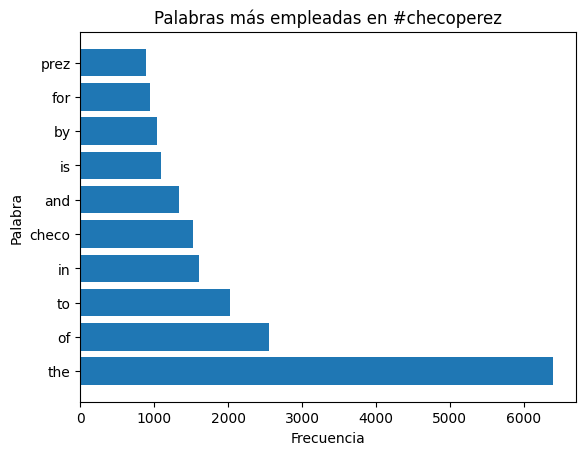

In [ ]:
# Grafica las palabras más empleadas
plt.barh(df_word_freq['Palabra'].head(10), df_word_freq['Frecuencia'].head(10))
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Palabras más empleadas en #checoperez')
plt.show()


### What sentiment is the most intense?

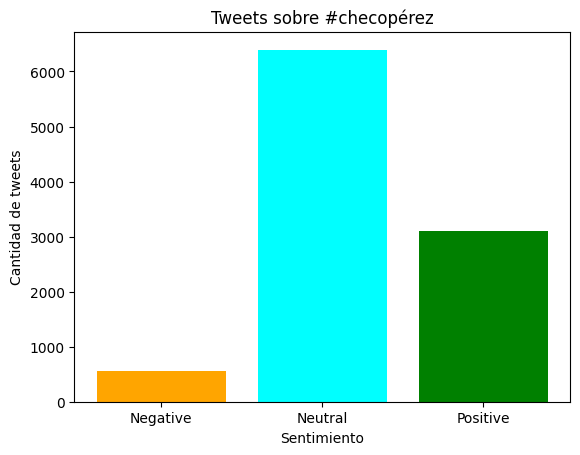

In [ ]:
import matplotlib.pyplot as plt

# Filter dataframe by topic
topic_df = df.loc[df['topic'] == '#checopérez']

# Filter the polarity of the values set by the library
negativos = topic_df[(topic_df['Polarid'] >= -1) & (topic_df['Polarid'] < 0)].count()
neutros = topic_df[topic_df['Polarid'] == 0].count()
positivos = topic_df[(topic_df['Polarid'] > 0) & (topic_df['Polarid'] <= 1)].count()

# Create a list with the names of the bars
bars = ['Negative', 'Neutral', 'Positive']

# Create a list with the number of tweets corresponding to each bar
heights = [negativos[0], neutros[0], positivos[0]]

# Create a list of colors
colors = ['orange', 'cyan', 'green']

# Create a figure and an Axes object for the plot
fig, ax = plt.subplots()

# Create the bar chart
ax.bar(bars, heights, color=colors)

# Add labels to the plot
ax.set_title('Tweets sobre #checopérez')
ax.set_xlabel('Sentimiento')
ax.set_ylabel('Cantidad de tweets')

# Show the plot
plt.show()


### How objective are the Tweets about the topic?

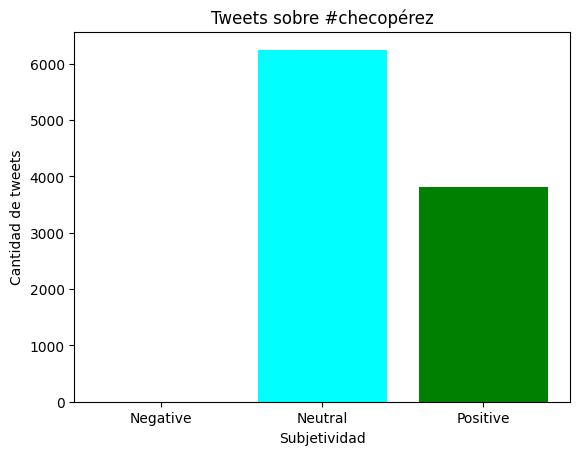

In [ ]:
import matplotlib.pyplot as plt

# Filter dataframe by topic
topic_df = df.loc[df['topic'] == '#checopérez']

# Filter dataframe by polarity of values determined by the library
negativos = topic_df[(topic_df['Subjectividad'] >= -1) & (topic_df['Subjectividad'] < 0)].count()
neutros = topic_df[topic_df['Subjectividad'] == 0].count()
positivos = topic_df[(topic_df['Subjectividad'] > 0) & (topic_df['Subjectividad'] <= 1)].count()

# Create a list with the names of the bars
bars = ['Negative', 'Neutral', 'Positive']

# Create a list with the number of tweets corresponding to each bar
heights = [negativos[0], neutros[0], positivos[0]]

# Create a list of colors
colors = ['orange', 'cyan', 'green']

# Create a figure and an Axes object for the plot
fig, ax = plt.subplots()

# Create the bar plot
ax.bar(bars, heights, color=colors)

# Add labels to the plot
ax.set_title('Tweets sobre #checopérez')
ax.set_xlabel('Subjetividad')
ax.set_ylabel('Cantidad de tweets')

# Show the plot
plt.show()

### What level of positivity is expected for the comments tomorrow?

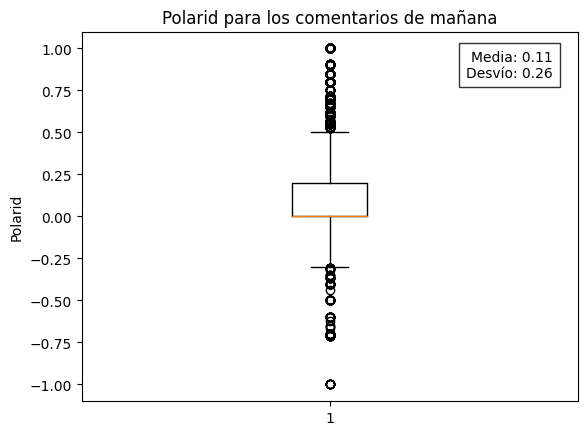

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of Polarity
media = df['Polarid'].mean()
desvio = df['Polarid'].std()

# Create the boxplot
fig, ax = plt.subplots()
ax.boxplot(df['Polarid'])
ax.set_title('Polarid para los comentarios de mañana')
ax.set_ylabel('Polarid')
ax.text(0.95, 0.95, f'Media: {media:.2f}\nDesvío: {desvio:.2f}', transform=ax.transAxes,
        ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8, pad=5))
plt.show()
